# 第4部　確率と確率分布の基本
## 4章　正規分布

### 実装：分析の準備

In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
from scipy import stats

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# グラフの日本語表記
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Meiryo'

In [2]:
# 表示設定(書籍本文のレイアウトと合わせるためであり、必須ではありません)
np.set_printoptions(linewidth=60)
pd.set_option('display.width', 60)

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4

### 実装：正規分布の確率密度関数

#### 正規分布の確率密度関数

In [3]:
# 正規分布の確率密度関数
# (平均値4、分散1、確率変数は3)
round(stats.norm.pdf(loc=4, scale=1, x=3), 3)

0.242

#### インスタンスを生成してから実行する

In [4]:
norm_dist = stats.norm(loc=4, scale=1)
round(norm_dist.pdf(x = 3), 3)

0.242

#### 正規分布の確率密度のグラフ

In [5]:
# 正規分布の確率密度関数(平均4、分散1)
# 確率変数が0から8をとる確率密度を各々計算

# 確率変数
x = np.arange(start=0, stop=8, step=0.1)
# 確率密度
density = stats.norm.pdf(x=x, loc=4, scale=1)

# データフレームにまとめる
density_df = pd.DataFrame({
    'x': x,
    'density': density
})

print(density_df.head(3))

     x   density
0  0.0  0.000134
1  0.1  0.000199
2  0.2  0.000292


<AxesSubplot:>

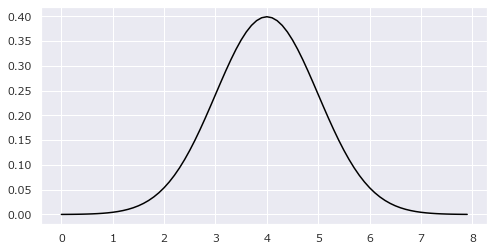

In [6]:
# 折れ線グラフ（正規分布の確率密度関数）
sns.lineplot(x=x, y=density, 
             data=density_df, color='black')

#### パラメータを変化させたときの正規分布

In [7]:
# 参考(書籍には載っていないコードです。書籍本文中のグラフを作成するためのコードです)
# 確率変数が0から8をとる確率密度を各々計算

# 確率変数
x = np.arange(start=0, stop=8, step=0.1)
# 確率密度
density_41 = stats.norm.pdf(x=x, loc=4, scale=1)
density_21 = stats.norm.pdf(x=x, loc=2, scale=1)
density_42 = stats.norm.pdf(x=x, loc=4, scale=2)

# データフレームにまとめる
density_df_2 = pd.DataFrame({
    'x': x,
    '平均4、分散1': density_41,
    '平均2、分散1': density_21,
    '平均4、分散4': density_42,
})

print(density_df_2.head(3))

     x   平均4、分散1   平均2、分散1   平均4、分散4
0  0.0  0.000134  0.053991  0.026995
1  0.1  0.000199  0.065616  0.029797
2  0.2  0.000292  0.078950  0.032808


Text(0, 0.5, '')

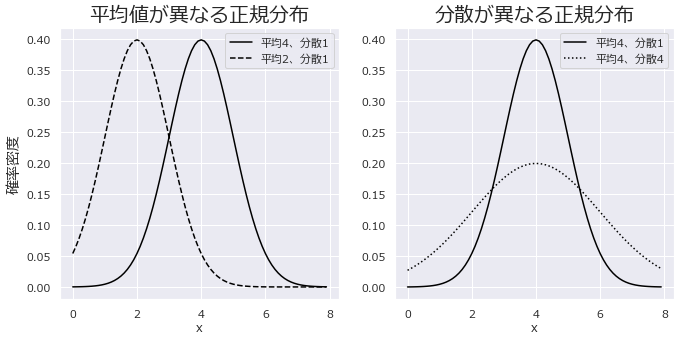

In [8]:
# 参考(書籍には載っていないコードです。書籍本文中のグラフを作成するためのコードです)

# 2列のグラフを作る
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))

# 1つ目のグラフは、平均値が異なる2種類の正規分布のグラフを描く
sns.lineplot(ax=axes[0], x='x', y='平均4、分散1', linestyle='solid',  color='black', data=density_df_2, label='平均4、分散1')
sns.lineplot(ax=axes[0], x='x', y='平均2、分散1', linestyle='dashed', color='black', data=density_df_2, label='平均2、分散1')
# 1つ目のグラフの装飾
axes[0].set_title('平均値が異なる正規分布', size=20) # グラフタイトル
axes[0].set_ylabel('確率密度', size=15)              # Y軸ラベル

# 2つ目のグラフは、分散が異なる2種類の正規分布のグラフを描く
sns.lineplot(ax=axes[1], x='x', y='平均4、分散1', linestyle='solid',  color='black', data=density_df_2, label='平均4、分散1')
sns.lineplot(ax=axes[1], x='x', y='平均4、分散4', linestyle='dotted', color='black', data=density_df_2, label='平均4、分散4')
# 2つ目のグラフの装飾
axes[1].set_title('分散が異なる正規分布', size=20) # グラフタイトル
axes[1].set_ylabel('')                             # Y軸ラベル

### 実装：誤差の累積シミュレーション

#### 誤差の累積シミュレーションの考え方

In [9]:
# ノイズが加算される回数
n_noise = 10000

# 中心位置
location = 4

# 小さな誤差
noise = np.array([-0.01, 0.01])

In [10]:
# 中心位置にノイズをn_noise個加える
np.random.seed(5)
location + np.sum(np.random.choice(noise, size = n_noise, 
                                   replace = True))

3.52

In [11]:
# 実行するたびに異なる値になる
location + np.sum(np.random.choice(noise, size = n_noise, 
                                   replace = True))

2.62

#### シミュレーションを5万回繰り返す

In [12]:
# 試行回数
n_trial = 50000

# ノイズの累積として得られた観測値
observation_result = np.zeros(n_trial)

# locationに誤差をn_noise個ランダムに加える試行をn_trial回行う
np.random.seed(1)
for i in range(0, n_trial):
    observation_result[i] = location + \
    np.sum(np.random.choice(noise, size = n_noise, 
                            replace = True))

#### シミュレーション結果の確認

In [13]:
# 乱数の平均と分散
x_bar = np.mean(observation_result)
u2 = np.var(observation_result, ddof=1)
print('平均：', round(x_bar, 1))
print('分散：', round(u2, 1))

平均： 4.0
分散： 1.0


<AxesSubplot:ylabel='Density'>

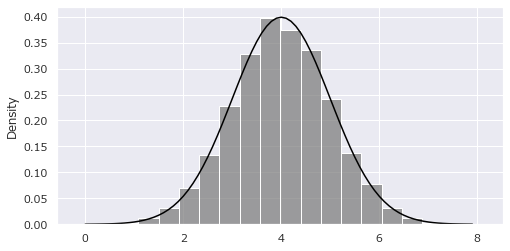

In [14]:
# 誤差の累積シミュレーション結果のヒストグラム
sns.histplot(observation_result, bins=20, 
             stat='density', color='gray')

# 平均4、分散1の正規分布の確率密度関数の折れ線グラフ
sns.lineplot(x=x, y=density, 
             data=density_df, color='black')

### 実装：正規分布に従う乱数の生成

In [15]:
np.random.seed(1)
simulated_sample = stats.norm.rvs(
    loc=4, scale=1, size=8)
simulated_sample

array([5.62434536, 3.38824359, 3.47182825, 2.92703138,
       4.86540763, 1.6984613 , 5.74481176, 3.2387931 ])

### 実装：正規分布の累積分布関数

In [16]:
# 正規分布の累積分布関数（3を下回る確率）
round(stats.norm.cdf(loc=4, scale=1, x=3), 3)

0.159

In [17]:
# 平均値を下回る確率はちょうど50%
round(stats.norm.cdf(loc=4, scale=1, x=4), 3)

0.5

### 実装：正規分布のパーセント点

In [18]:
# 正規分布のパーセント点（下側確率が0.025となる点）
round(stats.norm.ppf(loc=4, scale=1, q=0.025), 3)

2.04

In [19]:
# 50%点は平均値と等しい
round(stats.norm.ppf(loc=4, scale=1, q=0.5), 3)

4.0

### 正規分布の上側確率

In [20]:
# 3以上になる確率
round(stats.norm.sf(loc=4, scale=1, x=3), 3)

0.841